In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('default_of_credit_card_clients.xls')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null object
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_1                         30000 non-null object
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6             

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
df.ID.nunique()

29687

In [7]:
df.shape

(30000, 25)

**Observation:** We can notice that the number of unique ID's is less than the number of rows i.e. ID is not a unique identifier for the rows of the Data.

In [8]:
id_counts = df.ID.value_counts()
id_counts.head()

c5368117-b498    2
f63d8fbe-d79e    2
775d61d0-4715    2
659da309-053c    2
80282ca6-96a6    2
Name: ID, dtype: int64

In [9]:
# Generates value count for each unique count value in id_counts
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

**Observation:** We can notice that there are 313 ID's which are repeated twice.

In [10]:
import numpy as np

In [11]:
np.random.seed(seed=24)


In [12]:
random_integers = np.random.randint(low=1,high=5,size=100)
random_integers.shape, random_integers[:5]

((100,), array([3, 4, 1, 4, 2]))

In [13]:
is_equal_to_3 = random_integers == 3

In [14]:
is_equal_to_3[:5]


array([ True, False, False, False, False])

In [15]:
sum(is_equal_to_3)


22

In [16]:
random_integers[is_equal_to_3]


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [17]:
id_counts = df['ID'].value_counts()
dupe_mask = id_counts == 2
dupe_mask[0:5]

c5368117-b498    True
f63d8fbe-d79e    True
775d61d0-4715    True
659da309-053c    True
80282ca6-96a6    True
Name: ID, dtype: bool

In [18]:
id_counts.index[:5]

Index(['c5368117-b498', 'f63d8fbe-d79e', '775d61d0-4715', '659da309-053c',
       '80282ca6-96a6'],
      dtype='object')

In [19]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [20]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
9613,c5368117-b498,120000,1,1,1,34,2,2,2,2,...,101937,104159,102324,4000,4000,4000,4000,0,8000,1
9713,c5368117-b498,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25215,775d61d0-4715,30000,2,1,2,23,0,0,0,0,...,17659,18066,18775,1300,1300,1300,700,1000,1000,1
25315,775d61d0-4715,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25550,f63d8fbe-d79e,470000,2,1,1,37,-1,0,0,0,...,42003,39994,41816,5305,3500,38007,3000,3507,2500,0
25650,f63d8fbe-d79e,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_zero_mask = df == 0
df_zero_mask.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True


In [22]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)


315

In [23]:
feature_zero_mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [24]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()


In [25]:
df_clean_1['ID'].nunique()


29685

In [26]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
ID                            29685 non-null object
LIMIT_BAL                     29685 non-null int64
SEX                           29685 non-null int64
EDUCATION                     29685 non-null int64
MARRIAGE                      29685 non-null int64
AGE                           29685 non-null int64
PAY_1                         29685 non-null object
PAY_2                         29685 non-null int64
PAY_3                         29685 non-null int64
PAY_4                         29685 non-null int64
PAY_5                         29685 non-null int64
PAY_6                         29685 non-null int64
BILL_AMT1                     29685 non-null int64
BILL_AMT2                     29685 non-null int64
BILL_AMT3                     29685 non-null int64
BILL_AMT4                     29685 non-null int64
BILL_AMT5                     29685 non-null int64
BILL_AMT6             

In [27]:
df_clean_1.PAY_1.head(10)

0     2
1    -1
2     0
3     0
4    -1
5     0
6     0
7     0
8     0
9    -2
Name: PAY_1, dtype: object

In [28]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [29]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [30]:
sum(valid_pay_1_mask)

26664

In [31]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
df_clean_2.shape

(26664, 25)

In [32]:
df_clean_2.PAY_1.value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [33]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
PAY_1    26664 non-null int64
PAY_2    26664 non-null int64
dtypes: int64(2)
memory usage: 624.9 KB


### Exploring the Credit Limit and Demographic Features

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
plt.style.use('dark_background')
mpl.rcParams['figure.dpi'] = 150 # high resolutions figures

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234736784C8>,
      dtype=object)

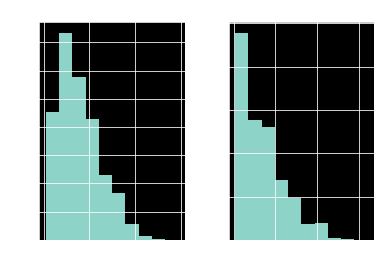

In [35]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [36]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [37]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

Here, we see undocumented education levels 0, 5, and 6, as the data dictionary describes only "Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)". Our business partner tells us they don't know about the others. Since they are not very prevalent, we will lump them in with the "others" category.

In [38]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [39]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

The issue here is similar to that encountered for the EDUCATION feature; there is a value, 0, which is not documented in the data dictionary: "1 = married; 2 = single; 3 = others". So we'll lump it in with "others".

In [40]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

Text(0.5, 0, 'Education level: ordinal encoding')

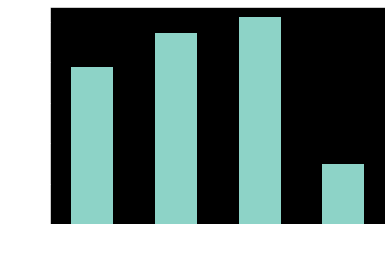

In [41]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend = False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

In [42]:
df_clean_2['EDUCATION_CAT'] = 'none'


In [43]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)


,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [44]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [45]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [46]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [47]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)

In [48]:
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [49]:
df_with_ohe.to_csv('cleaned_data.csv', index=False)

In [50]:
df = pd.read_csv('cleaned_data.csv')